# Homework 4 : Model Selection

The goal of this homework is find a suitable model that can distinguish handwritten digits.

In [28]:
import random
import torchvision
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import sklearn

def prepareData(n=1000):
    """
    Downloads the dataset. Displays some examples.
    Returns the labeled dataset.

    Parameters
    ----------
    n : number of data sample (max 70 000)

    Returns
    -------
    X : Data Matrix
        (n, 28, 28).
    y : labels
        n

    """
    mnist_train = torchvision.datasets.MNIST("./data", download=True,)
    mnist_test = torchvision.datasets.MNIST("./data", download=True, train = False)
    

    
    X = []
    y = []
    for x,label in mnist_train:
        X.append(np.array(x))
        y.append(label)
    
    X_test = []
    y_test = []
    for x,label in mnist_test:
        X_test.append(np.array(x))
        y_test.append(label)
    
    X = np.array(X)
    y = np.array(y)
    X_test= np.array(X_test)
    y_test = np.array(y_test)
    
    
    sample = random.sample(range(len(X)), n)
    X = np.concatenate((X,X_test))[sample]
    y = np.concatenate((y,y_test))[sample]
    
    
    return X,y

def showSamples(X,y):
    fig=plt.figure(figsize=(8, 5))
    columns = 5
    rows = 2
    imgs = [X[i,:,:] for i in range(10)]
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(X[i-1,:,:] , cmap ="gray")
        plt.axis('off')
        plt.title(str(y[i-1]))
    plt.show()

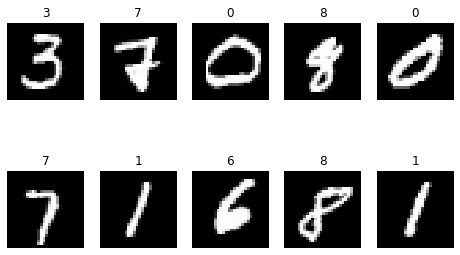

Shape of data matrix X: (1000, 28, 28)
Shape of labels y: (1000,)


In [29]:
X,y = prepareData(1000)
showSamples(X,y)
print("Shape of data matrix X:", X.shape)
print("Shape of labels y:", y.shape)

# Extract features and Train Model

TODO:
- Use any feature extraction method. Compute edges, histogram of oriented gradients, contours etc. to get a more concise representation of the images. 
- Train different models to learn a classification. 
 - You can use any classification model. However, it is easier to use the models from sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
 

In [19]:
def featureExtraction(x):
    """
    Applies a feature extraction on a singular image.

    Parameters
    ----------
    x : ndarray
        a numpy array of shape 28x28

    Returns
    -------
    ndarray
        The resulting feature should be one-dimensional (use x.flatten())
    """
    #TODO: Define a feauture extraction method. 
    # This method is called individually on each data point. 
    # You can also look into methods that do feature extraction on the complete dataset.
    return x.flatten()

def preprocessDataset(X):
    """
    Applies a feature extraction on a dataset

    Parameters
    ----------
    X : ndarray
        Data matrix of size nx28x28
    Returns
    -------
    X_prep : ndarray
        Data matrix of size nxd where d is some dimension of the feature
    """
    
    # TODO: (Optional) You can change this if necessary
    X_prep = []
    for i in range(len(X)):
        x = X[i,:,:]
        x = featureExtraction(x)
        X_prep.append(x)    
    X_prep = np.array(X_prep)
    return X_prep


def train(X,y):
    # TODO: Select a classifier from sklearn and train it on the data
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(X,y)
    return model

# K-fold Cross Validation

TODO:
- Implement K-Fold Cross Validation
 - Split data into k partitions
 - Train model on k-1 partitions
 - Evaluate model on remaining partition using **Accuracy** as a metric
 - repeat k-times and compute **average Accuracy** over all splits
 
The following code computes cross-validation on a single data split.
Adjust the code to evaluate on multiple splits.

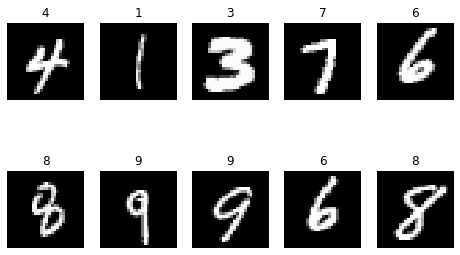

Accuracy Training: 0.5676
Accuracy Test: 0.5702


In [26]:
# Number of data samples (reduce number during initial test runs if procedure takes too long)
n = 50000
X,y = prepareData(n)


# Feature extraction
D = preprocessDataset(X)

# Number of k-folds
n_splits = 5
train_size = len(X) - len(X)//n_splits


# Cross Validation on a single split: First k-1 splits are used for training and remaining for evaluation.
X_train, X_test = D[:train_size], D[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train model
model = train(X_train,y_train)

# Evaluate model on unseen data
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Accuracy Training:", accuracy_score(y_train,y_pred_train))
print("Accuracy Test:", accuracy_score(y_test,y_pred))

# Document your model selection

TODO:
- Repeat the previous steps, adjust your feature extraction and classification methods until you get satisfying accuracy results.
- Document your experiments. 
- **Tip:** Adjust the previous code, such that you can run multiple experiments, e.g. run different combinations of feature extractors and classifiers.